In [5]:
import pandas as pd

df = pd.read_csv('mta_6_17_17.csv')
df.columns = df.columns.str.strip()
df = df[(df.TIME == '05:00:00') | (df.TIME == '06:00:00') | (df.TIME == '07:00:00')|(df.TIME == '08:00:00') | (df.TIME == '09:00:00') | (df.TIME == '10:00:00')| (df.TIME == '11:00:00') | (df.TIME == '12:00:00')| (df.TIME == '13:00:00') | (df.TIME == '14:00:00') | (df.TIME == '15:00:00')|(df.TIME == '16:00:00') | (df.TIME == '17:00:00') | (df.TIME == '18:00:00')| (df.TIME == '19:00:00') | (df.TIME == '20:00:00') | (df.TIME == '21:00:00') | (df.TIME == '22:00:00') | (df.TIME == '23:00:00')|(df.TIME == '00:00:00') | (df.TIME == '01:00:00') | (df.TIME == '02:00:00')| (df.TIME == '03:00:00') | (df.TIME == '04:00:00') ]

#create a dateframe for sunday
sunday = df[df.DATE == '06/11/2017']
sunday = sunday.reset_index(drop=True)

#find the number of people at the exits for each station, SCP, unit, and C/A for each time period
exits = {}
for i in range(len(sunday.index)):
    mytuple = (sunday['C/A'][i], sunday.UNIT[i],sunday.SCP[i],sunday.STATION[i])
    if mytuple not in exits.keys():
        exits[mytuple]=[(sunday.TIME[i],sunday.EXITS[i])]
    else:
        exits[mytuple].append((sunday.TIME[i],sunday.EXITS[i]))

exits_diff = {}
for a,b in exits.items():
    for i in range(len(b)-1):
        diff = b[i+1][1]-b[i][1]
        if a not in exits_diff.keys():
            exits_diff[a]=[(b[i+1][0],diff)]
        else:
            exits_diff[a].append((b[i+1][0],diff))

#sunday_dict
sunday_dict = {}
for i in range( len(sunday.index) ):
    mytuple = (sunday["C/A"][i], sunday.UNIT[i], sunday.SCP[i], sunday.STATION[i])
    if mytuple not in sunday_dict.keys():
        sunday_dict[mytuple] = [(sunday.TIME[i], sunday.EXITS[i])]
    else:
        sunday_dict[mytuple].append((sunday.TIME[i], sunday.EXITS[i]))

#find the number of people at the entries for each station, SCP, unit, and C/A for each time period
entries = {}
for i in range(len(sunday.index)):
    mytuple = (sunday['C/A'][i], sunday.UNIT[i],sunday.SCP[i],sunday.STATION[i])
    if mytuple not in sunday_dict.keys():
        entries[mytuple]=[(sunday.TIME[i],sunday.ENTRIES[i])]
    else:
        sunday_dict[mytuple].append((sunday.TIME[i],sunday.ENTRIES[i]))

entries_diff = {}
for a,b in entries.items():
    for i in range(len(b)-1):
        diff = b[i+1][1]-b[i][1]
        if a not in entries_diff.keys():
            entries_diff[a]=[(b[i+1][0],diff)]
        else:
            entries_diff[a].append((b[i+1][0],diff))

#combine the exits and entries numbers
n_mon = {}
for a,b in exits_diff.items():
    for i in range(len(b)):
        n_mon[(a[0],a[1],a[2],a[3],b[i][0])]=b[i][1]
        
for a,b in entries_diff.items():
    for i in range(len(b)):
        n_mon[(a[0],a[1],a[2],a[3],b[i][0])]+=b[i][1]

#sort the numbers in a list and find out the times and locations where we get the most number of people
n = []
for a,b in n_mon.items():
    n.append((a,b))
n = sorted(n, key=lambda x:(-x[1],x[0]))

print('Locations and Times on Sunday: ')
for i in range(1,31):
    print(i, n[i])

#for item in n:
#    if "72nd" or "77th" or "86" in item:
#        print(item)
#print(n)


Locations and Times on Sunday: 
1 (('N083', 'R138', '01-00-00', 'W 4 ST-WASH SQ', '17:00:00'), 1617)
2 (('A034', 'R170', '03-00-00', '14 ST-UNION SQ', '17:00:00'), 1504)
3 (('N506', 'R022', '00-00-00', '34 ST-HERALD SQ', '16:00:00'), 1430)
4 (('N067', 'R012', '00-05-00', '34 ST-PENN STA', '20:00:00'), 1347)
5 (('N063A', 'R011', '00-00-00', '42 ST-PORT AUTH', '20:00:00'), 1307)
6 (('N083', 'R138', '01-00-01', 'W 4 ST-WASH SQ', '17:00:00'), 1285)
7 (('R240', 'R047', '00-00-00', 'GRD CNTRL-42 ST', '17:00:00'), 1261)
8 (('N083', 'R138', '01-00-00', 'W 4 ST-WASH SQ', '21:00:00'), 1257)
9 (('R249', 'R179', '01-00-09', '86 ST', '16:00:00'), 1255)
10 (('N067', 'R012', '00-05-00', '34 ST-PENN STA', '16:00:00'), 1246)
11 (('R151', 'R033', '00-00-04', 'TIMES SQ-42 ST', '16:00:00'), 1187)
12 (('H009', 'R235', '00-03-00', 'BEDFORD AV', '20:00:00'), 1172)
13 (('H009', 'R235', '00-03-00', 'BEDFORD AV', '16:00:00'), 1153)
14 (('N080', 'R138', '00-00-00', 'W 4 ST-WASH SQ', '17:00:00'), 1138)
15 (('R249

<Container object of 30 artists>

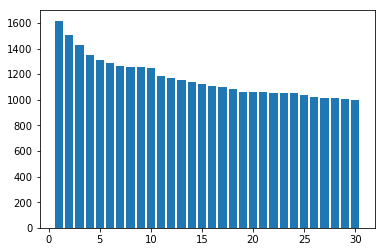

In [16]:
from datetime import datetime
import matplotlib.pyplot as plt
% matplotlib inline

x = []
y = []

for i in range(1, 31):
    x.append(i)
    y.append(n[i][1])
plt.bar(x, y)